# 1) Simulating t-test power

Here we simulate the power of the t-test for independent samples for several values of N. We plot the power as a function of the difference between sample means. This shows (unsurprisingly) that the t-test's power is greater the larger the difference between sample means. It also demonstrates that the t-test's power to detect a difference in sample means grows more quickly for greater N.

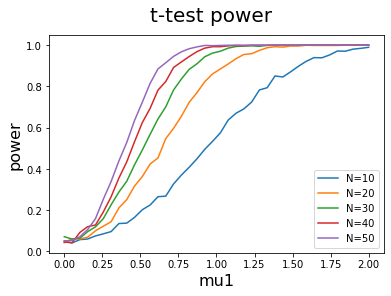

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

reps = 1000
ns = np.linspace(10, 50, 5)
mu1s, sigma1 = np.linspace(0, 2, 40), 1
mu2, sigma2 = 0, 1
npowers = []

# for values of n...
for n in ns:
    n1 = n2 = int(n)
    powers = []
    
    # iterate over values of mu1 and simulate power for each
    for mu1 in mu1s:
        pvals = []
        for r in range(0, reps):
            # generate normally distributed random data
            d1 = np.random.normal(mu1, sigma1, n1)
            d2 = np.random.normal(mu2, sigma2, n2)
            
            # apply t-test and find p-value
            pval = ttest_ind(d1, d2).pvalue
            
            # record p-value
            pvals.append(pval)
        
        # find & record the power (number of p-values less than the threshold)
        powers.append(sum([1 for p in pvals if p < 0.05]) / reps)
    
    # record the powers
    npowers.append(powers)

# reshape the powers into columns according to value of n
powmat = np.column_stack(npowers)

# create plot
fig = plt.figure()
plt.plot(mu1s, powmat)
fig.suptitle('t-test power', fontsize=20)
plt.xlabel('mu1', fontsize=16)
plt.ylabel('power', fontsize=16)
plt.legend(labels=['N=10','N=20', 'N=30', 'N=40','N=50'], ncol=1, loc='lower right')

# 3) Dice rolling 

This function simulates R rolls of n s-sided dice and returns the probability that the dice's sum takes a value between given lower and upper bounds.

The probability that the sum of three 6-sided dice is greater than or equal to 10 is 0.609
The probability that the sum of three 6-sided dice is and less than or equal to 10 is 0.497
The probability that the sum of three 6-sided dice is greater than or equal to 6 and less than or equal to 10 is 0.443


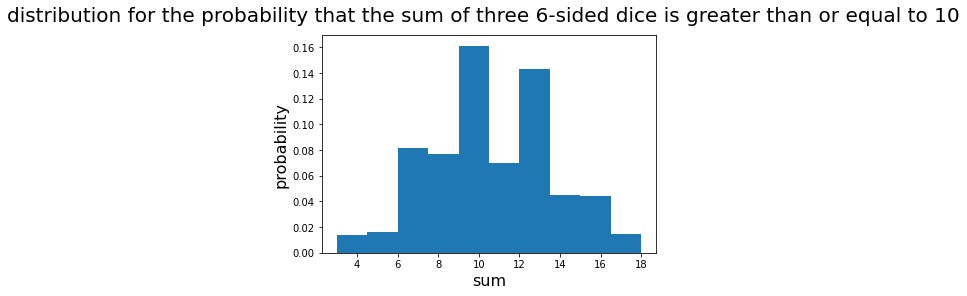

In [2]:
from random import randint
import inflect

ie = inflect.engine()

def roll_dice(s, n, L=None, U=None, R=1000, makeplot=True):
    sums = []
    
    # iterate R times
    for replicate in range(0, R):
        # roll n s-sided dice and sum & record the results
        sums.append(sum([randint(1, s) for die in range(0, n)]))
        
    # count sums within the region of consideration (& compose message to print)
    message = f"probability that the sum of {ie.number_to_words(n)} {s}-sided dice is "
    if L is not None and U is None:
        within = [1 for s in sums if s >= L]
        message += f"greater than or equal to {L}"
    elif L is None and U is not None:
        within = [1 for s in sums if s <= U]
        message += f"and less than or equal to {U}"
    elif L is not None and U is not None:
        within = [1 for s in sums if (s <= U and s >= L)]
        message += f"greater than or equal to {L} and less than or equal to {U}"
    
    # compute the overall probability
    p = sum(within) / R
    print(f"The {message} is {p}")
            
    # create plots if flag is set
    if makeplot:
        plt.close()
        fig = plt.figure()
        plt.hist(sums, density=True)
        fig.suptitle(f"distribution for the {message}", fontsize=20)
        plt.xlabel('sum', fontsize=16)
        plt.ylabel('probability', fontsize=16)

roll_dice(6, 3, L=10)
roll_dice(6, 3, U=10, makeplot=False)
roll_dice(6, 3, L=6, U=10, makeplot=False)